In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import time
import seaborn as sns
import random
import math

### Read predictions

In [3]:
import os
os.chdir('/mnt/guanabana/raid/home/slomp006')

# Read predictions for each year
pred2015 = pd.read_csv("Output/RF/predict2015_harmonised.csv")
pred2016 = pd.read_csv("Output/RF/predict2016_harmonised.csv")
pred2017 = pd.read_csv("Output/RF/predict2017_harmonised.csv")
pred2018 = pd.read_csv("Output/RF/predict2018_harmonised.csv")

# Remove NaN predictions
pred2015 = pred2015.dropna()
pred2016 = pred2016.dropna()
pred2017 = pred2017.dropna()
pred2018 = pred2018.dropna()

# Prediction don't have the same length. Use similar IDs.
common_ids = set(pred2015['sample_id']).intersection(pred2016['sample_id'], pred2017['sample_id'], pred2018['sample_id'])

# Filter the DataFrames to only include rows with common sample_id values
pred2015 = pred2015[pred2015['sample_id'].isin(common_ids)]
pred2016 = pred2016[pred2016['sample_id'].isin(common_ids)]
pred2017 = pred2017[pred2017['sample_id'].isin(common_ids)]
pred2018 = pred2018[pred2018['sample_id'].isin(common_ids)]

# Sort similarly
pred2015 = pred2015.sort_values(by=['sample_id'])
pred2016 = pred2016.sort_values(by=['sample_id'])
pred2017 = pred2017.sort_values(by=['sample_id'])
pred2018 = pred2018.sort_values(by=['sample_id'])

# Only use the class columns
classes = ['tree', 'shrub', 'grassland', 'crops', 
           'urban_built_up', 'bare', 'water']

pred2015 = pred2015[classes]
pred2016 = pred2016[classes]
pred2017 = pred2017[classes]
pred2018 = pred2018[classes]

In [4]:
print(pred2015.shape, pred2016.shape, pred2017.shape, pred2018.shape)

(29670, 7) (29670, 7) (29670, 7) (29670, 7)


In [5]:
pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,5.442177,0.000000,0.000000,94.557823,0.000000,0.000000,0.000000
1,47.826087,17.391304,34.782609,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
3,2.439024,17.073171,0.000000,0.000000,80.487805,0.000000,0.000000
4,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
5,2.500000,0.000000,0.000000,97.500000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
7,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
8,3.225806,0.000000,0.000000,0.000000,96.774194,0.000000,0.000000
9,79.279279,0.000000,20.720721,0.000000,0.000000,0.000000,0.000000


### Read training 

In [24]:
traindf = pd.read_csv("Input/Change/train20152018.csv")

df2015 = traindf.loc[traindf['reference_year'] == 2015]
df2016 = traindf.loc[traindf['reference_year'] == 2016]
df2017 = traindf.loc[traindf['reference_year'] == 2017]
df2018 = traindf.loc[traindf['reference_year'] == 2018]

# Again, only use class columns
df2015 = df2015[df2015.columns.intersection(classes)]
df2016 = df2016[df2015.columns.intersection(classes)]
df2017 = df2017[df2015.columns.intersection(classes)]
df2018 = df2018[df2015.columns.intersection(classes)]

Create cooccurence matrix (how do classes relate with each other). To do so, create binary data frame and normalise data. Transpose to get the matrix.

In [25]:
# New coocc normalise before multiplication with transpose

binary = (df2015 > 0).astype(int)
rawnorm = df2015.apply(lambda x: (x)/np.sqrt((x**2).sum()))

znorm = rawnorm.T.dot(rawnorm)
znorm > 0
znorm

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.000000,0.021370,0.062976,0.044269,0.019209,0.031382,0.018673
crops,0.021370,1.000000,0.030088,0.053612,0.038120,0.046986,0.003126
grassland,0.062976,0.030088,1.000000,0.199851,0.099501,0.057267,0.019905
shrub,0.044269,0.053612,0.199851,1.000000,0.125819,0.050397,0.008756
tree,0.019209,0.038120,0.099501,0.125819,1.000000,0.080258,0.012894
urban_built_up,0.031382,0.046986,0.057267,0.050397,0.080258,1.000000,0.006469
water,0.018673,0.003126,0.019905,0.008756,0.012894,0.006469,1.000000


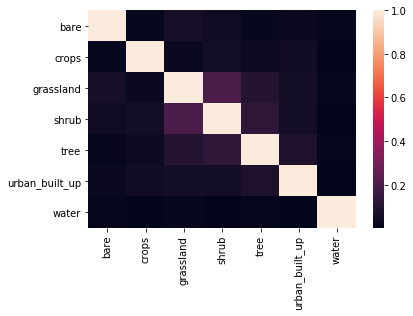

In [26]:
sns.heatmap(znorm)

## Build Markov chain

Run necessary functions first

In [27]:
# optimise_node

def optimise_node(node, edges, edges_within, stepsize=5):

    # describe edges
    e = calc_energy(node, edges, edges_within)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)

    node = minimise_energy(node, edges, edges_within, eSim, stepsize)

    return node

In [28]:
def calc_energy(node, edges, edges_within):
    
    param = 0.01
    e_coocc = edges_within * node * param
    
    
    # Old below
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e_coocc + e3
    
    return e1 + e2 + e_coocc

def calc_total_energy(nodes, edges, edges_within):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    edges_within2015 = edges_within[0]
    edges_within2016 = edges_within[1]
    edges_within2017 = edges_within[2]
    edges_within2018 = edges_within[3]
    
    e2015 = calc_energy(node2015, edges2015, edges_within2015)
    e2016 = calc_energy(node2016, edges2016, edges_within2016)
    e2017 = calc_energy(node2017, edges2017, edges_within2017)
    e2018 = calc_energy(node2018, edges2018, edges_within2018)
    
    return e2015 + e2016 + e2017 + e2018

def minimise_energy(node, edges, edges_within, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges, edges_within) < eSim[i] and (node + stepsize) <= 100:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node + stepsize, edges, edges_within) < eSim[i] and (node + stepsize) <= 100:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges, edges_within))
        
    elif calc_energy(node - stepsize, edges, edges_within) < eSim[i] and (node - stepsize) >= 0:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node - stepsize, edges, edges_within) < eSim[i] and (node - stepsize) >= 0:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges, edges_within))
    
    return node

In [29]:
def plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018):

    # Plot energy over iterations
    xs = [x for x in range(len(eTotal))]
    plt.figure(figsize=(15,6), dpi= 100)
    plt.subplot(1, 3, 1)
    plt.plot(xs, eTotal)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

    # Plot nodes over iterations
    xs = [x for x in range(len(nodeSim2015))]
    plt.subplot(1, 3, 2)
    plt.plot(xs, nodeSim2015)
    plt.plot(xs, nodeSim2016)
    plt.plot(xs, nodeSim2017)
    plt.plot(xs, nodeSim2018)
    plt.ylabel('Fraction', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.legend(["2015","2016","2017","2018"], loc="upper left", bbox_to_anchor=(1, 0.5))

    xs = ["2015","2016","2017","2018"]
    yRF = [rf2015,rf2016,rf2017,rf2018]
    yNode = [node2015,node2016,node2017,node2018]
    plt.subplot(1, 3, 3)
    plt.plot(xs, yRF)
    plt.plot(xs, yNode)
    plt.ylabel('Fractions', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.legend(["RF","Smoothed"], loc="upper left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

In [30]:
# How to change the paramters to get the optimal output:

# Coocc new 01:
# stepsize = 1
# param = 0.1

# Coocc new 001:
# stepsize = 1
# param = 0.01

# Coocc new 0001:
# stepsize = 1
# param = 0.001

RF-values:
           tree      shrub  grassland  crops  urban_built_up  bare  water
2015  12.269939  22.085890  65.644172    0.0             0.0   0.0    0.0
2016  10.112360  31.460674  58.426966    0.0             0.0   0.0    0.0
2017   6.756757  28.378378  64.864865    0.0             0.0   0.0    0.0
2018  10.810811  44.594595  44.594595    0.0             0.0   0.0    0.0

New values:
      bare  crops  grassland      shrub       tree  urban_built_up  water
2015   0.0    0.0  62.444172  25.385890  10.169939             0.0    0.0
2016   0.0    0.0  59.626966  29.360674   9.112360             0.0    0.0
2017   0.0    0.0  58.464865  31.678378   7.956757             0.0    0.0
2018   0.0    0.0  51.294595  37.894595   8.910811             0.0    0.0

 2015    98.0
2016    98.1
2017    98.1
2018    98.1
dtype: float64

Total run time: 0.057029008865356445
Part run time 2.4557113647460938e-05


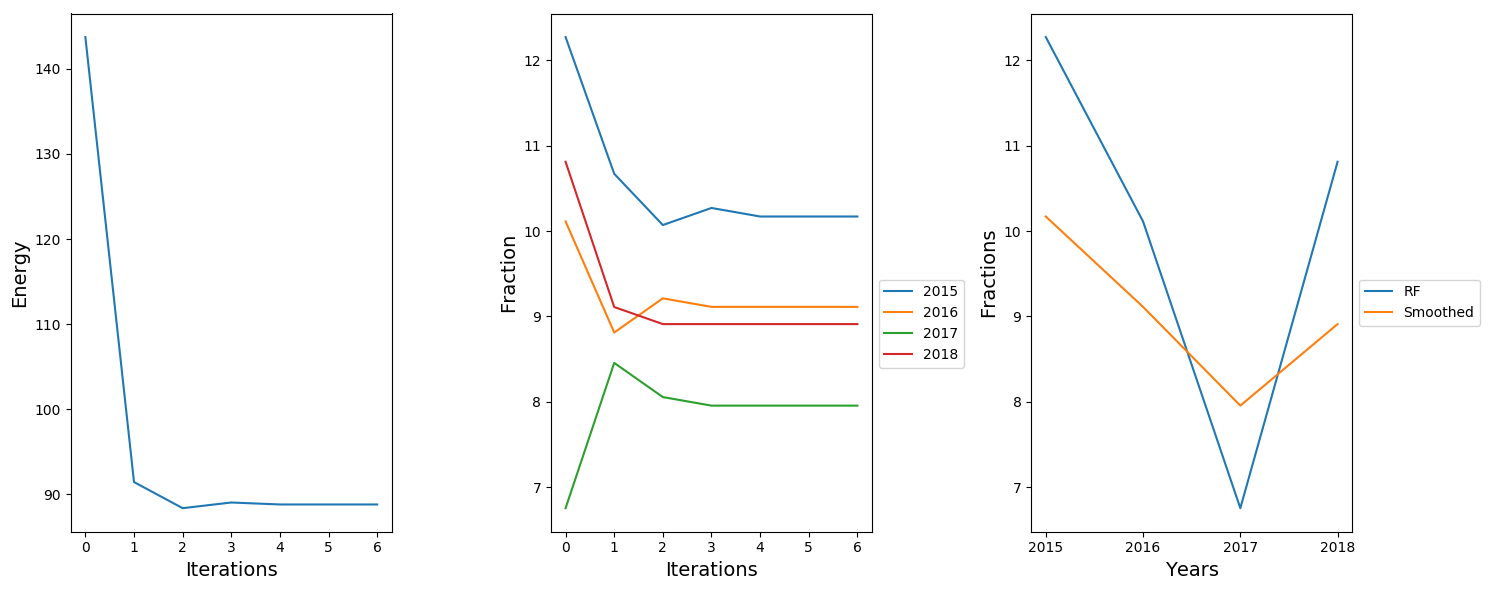

In [33]:
# Apply Markov chain model on ONE point only and check results.
t0 = time.time() # timer

i=1383

listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]
point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
print("RF-values:")
print(point_data.to_string())
#      tree shrub grass crops ... 
# 2015
# 2016
# 2017
# 2018

random.shuffle(classes)

# for j in classes:...
#j=1
for j in range(len(classes)):
    
    #initialise    
    rf2015 = listofdicts[0][classes[j]]
    rf2016 = listofdicts[1][classes[j]]
    rf2017 = listofdicts[2][classes[j]]
    rf2018 = listofdicts[3][classes[j]]
    
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = .1
    plot = True

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Within-year classes
    otherClasses = classes[:j] + classes[j+1:]
    #print("\nOther classes:", otherClasses)
    other2015 = {key: listofdicts[0][key] for key in otherClasses}
    other2016 = {key: listofdicts[1][key] for key in otherClasses}
    other2017 = {key: listofdicts[2][key] for key in otherClasses}
    other2018 = {key: listofdicts[3][key] for key in otherClasses}
   

    # Within-year energy 2015
    corr = znorm.loc[classes[j]][other2015.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2015 = sum([other2015[key] * log[key] for key in keys])

    # Within-year energy 2016
    corr = znorm.loc[classes[j]][other2016.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2016 = sum([other2016[key] * log[key] for key in keys])
    
    # Within-year energy 2017
    corr = znorm.loc[classes[j]][other2017.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2017 = sum([other2017[key] * log[key] for key in keys])
    
    # Within-year energy 2018
    corr = znorm.loc[classes[j]][other2018.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2018 = sum([other2018[key] * log[key] for key in keys])
    
    
    t1 = time.time()

    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017)),
                                    edges_within = (within2015,within2016,within2017,within2018)))

    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                          edges = ((rf2015,node2016),
                                   (rf2016,node2015,node2017),
                                   (rf2017,node2016,node2018),
                                   (rf2018,node2017)),
                          edges_within = (within2015,within2016,within2017,within2018))
    #print(e) # now edges_wihtin implemented in calc_energy and calc_total_energy
    # todo: implement in optimise_node and minimise_node -> done

    
    
    
    t2 = time.time()

    
    
    
    
    # Iterations over one chain
    for k in range(10):

        
        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
        nodeSim2015.append(node2015)
        
        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
        nodeSim2018.append(node2018)            
            
        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
        eTotal.append(e)

    
    # print(" Final node 2015:", node2015)
    # print(" Final node 2016:", node2016)
    # print(" Final node 2017:", node2017)
    # print(" Final node 2018:", node2018,"\n")

    # update point_data with optimised nodes
    listofdicts[0][classes[j]] = node2015
    listofdicts[1][classes[j]] = node2016
    listofdicts[2][classes[j]] = node2017
    listofdicts[3][classes[j]] = node2018
    

print("\nNew values:")
#print(point_data.to_string())

print(pd.DataFrame(listofdicts, index=(2015,2016,2017,2018)))

print("\n",pd.DataFrame(listofdicts, index=(2015,2016,2017,2018)).sum(axis=1))


t3 = time.time() # timer
print("\nTotal run time:", t3-t0)
print("Part run time", t2-t1)





# Now done for one class
# TODO: make it applicable for all classes of this point
if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)


### Run Markov chain

In [ ]:
from tqdm import tqdm

# Run on all/part points

# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

# Classes will be shuffled so use a copy
classes = ['tree', 'shrub', 'grassland', 'crops', 
           'urban_built_up', 'bare', 'water']
classlist = classes.copy()

# Loop over the training epochs
with tqdm(total=len(pred2015), desc='Running Markov Chain...', position=0, leave=True) as pbar:
    
    for i in tqdm(range(len(pred2015)), desc='Running Markov Chain...', position=0, leave=True):
        
        # Progressbar
        pbar.update()

        listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]
    
        random.shuffle(classlist)

        for j in range(len(classlist)):

            #initialise    
            rf2015 = listofdicts[0][classlist[j]]
            rf2016 = listofdicts[1][classlist[j]]
            rf2017 = listofdicts[2][classlist[j]]
            rf2018 = listofdicts[3][classlist[j]]

            node2015 = rf2015
            node2016 = rf2016
            node2017 = rf2017
            node2018 = rf2018

            # Stepsize to find optimal fraction
            stepsize = 1
            plot = False

            # Keep track of nodes over iterations (useful to check with plot=True)
            nodeSim2015 = []
            nodeSim2016 = []
            nodeSim2017 = []
            nodeSim2018 = []
            nodeSim2015.append(node2015)
            nodeSim2016.append(node2016)
            nodeSim2017.append(node2017)
            nodeSim2018.append(node2018)

            # Within-year classes
            otherClasses = classlist[:j] + classlist[j+1:]
            other2015 = {key: listofdicts[0][key] for key in otherClasses}
            other2016 = {key: listofdicts[1][key] for key in otherClasses}
            other2017 = {key: listofdicts[2][key] for key in otherClasses}
            other2018 = {key: listofdicts[3][key] for key in otherClasses}

            # Within-year energy 2015
            corr = znorm.loc[classlist[j]][other2015.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2015 = sum([other2015[key] * log[key] for key in keys])

            # Within-year energy 2016
            corr = znorm.loc[classlist[j]][other2016.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2016 = sum([other2016[key] * log[key] for key in keys])

            # Within-year energy 2017
            corr = znorm.loc[classlist[j]][other2017.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2017 = sum([other2017[key] * log[key] for key in keys])

            # Within-year energy 2018
            corr = znorm.loc[classlist[j]][other2018.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2018 = sum([other2018[key] * log[key] for key in keys])

            eTotal = []
            eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                            edges = ((rf2015,node2016),
                                                     (rf2016,node2015,node2017),
                                                     (rf2017,node2016,node2018),
                                                     (rf2018,node2017)),
                                            edges_within = (within2015,within2016,within2017,within2018)))

            e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                  edges = ((rf2015,node2016),
                                           (rf2016,node2015,node2017),
                                           (rf2017,node2016,node2018),
                                           (rf2018,node2017)),
                                  edges_within = (within2015,within2016,within2017,within2018))


            # Iterations over one chain
            for k in range(10):

                # Stop if total energy remains stable 3 iterations in a row
                if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                    break

                # Optimise node's value of 2015
                node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
                nodeSim2015.append(node2015)

                # Optimise node's value of 2016
                node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
                nodeSim2016.append(node2016)

                # Optimise node's value of 2017
                node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
                nodeSim2017.append(node2017)

                # Optimise node's value of 2018
                node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
                nodeSim2018.append(node2018)            

                # Calculate and store new total energy
                nodes = (node2015, node2016, node2017, node2018)
                edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
                e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
                eTotal.append(e)

            # update point_data with optimised nodes
            listofdicts[0][classlist[j]] = node2015
            listofdicts[1][classlist[j]] = node2016
            listofdicts[2][classlist[j]] = node2017
            listofdicts[3][classlist[j]] = node2018

        # Save updated values in list
        smooth2015.append([fraction for fraction in listofdicts[0].values()])
        smooth2016.append([fraction for fraction in listofdicts[1].values()])
        smooth2017.append([fraction for fraction in listofdicts[2].values()])
        smooth2018.append([fraction for fraction in listofdicts[3].values()])


t1 = time.time() # timer
print("Total run time:", t1-t0)
#print("Part run time", t2-t1)

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=classes)
smooth2016 = pd.DataFrame(smooth2016, columns=classes)
smooth2017 = pd.DataFrame(smooth2017, columns=classes)
smooth2018 = pd.DataFrame(smooth2018, columns=classes)

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")

In [34]:
# Run on all/part points

# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

# Loop over the training epochs
with tqdm(total=len(pred2015), desc='Running Markov Chain...', position=0, leave=True) as pbar:
    
    for i in tqdm(range(len(pred2015)), desc='Running Markov Chain...', position=0, leave=True):
        
        # Progressbar
        pbar.update()

        listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]

        random.shuffle(classes)

        for j in range(len(classes)):

            #initialise    
            rf2015 = listofdicts[0][classes[j]]
            rf2016 = listofdicts[1][classes[j]]
            rf2017 = listofdicts[2][classes[j]]
            rf2018 = listofdicts[3][classes[j]]

            node2015 = rf2015
            node2016 = rf2016
            node2017 = rf2017
            node2018 = rf2018

            # Stepsize to find optimal fraction
            stepsize = 1
            plot = False

            # Keep track of nodes over iterations (useful to check with plot=True)
            nodeSim2015 = []
            nodeSim2016 = []
            nodeSim2017 = []
            nodeSim2018 = []
            nodeSim2015.append(node2015)
            nodeSim2016.append(node2016)
            nodeSim2017.append(node2017)
            nodeSim2018.append(node2018)

            # Within-year classes
            otherClasses = classes[:j] + classes[j+1:]
            other2015 = {key: listofdicts[0][key] for key in otherClasses}
            other2016 = {key: listofdicts[1][key] for key in otherClasses}
            other2017 = {key: listofdicts[2][key] for key in otherClasses}
            other2018 = {key: listofdicts[3][key] for key in otherClasses}

            # Within-year energy 2015
            corr = znorm.loc[classes[j]][other2015.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2015 = sum([other2015[key] * log[key] for key in keys])

            # Within-year energy 2016
            corr = znorm.loc[classes[j]][other2016.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2016 = sum([other2016[key] * log[key] for key in keys])

            # Within-year energy 2017
            corr = znorm.loc[classes[j]][other2017.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2017 = sum([other2017[key] * log[key] for key in keys])

            # Within-year energy 2018
            corr = znorm.loc[classes[j]][other2018.keys()]
            log = corr.apply(lambda x: -math.log(x))
            keys = list(log.index)
            within2018 = sum([other2018[key] * log[key] for key in keys])

            eTotal = []
            eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                            edges = ((rf2015,node2016),
                                                     (rf2016,node2015,node2017),
                                                     (rf2017,node2016,node2018),
                                                     (rf2018,node2017)),
                                            edges_within = (within2015,within2016,within2017,within2018)))

            e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                  edges = ((rf2015,node2016),
                                           (rf2016,node2015,node2017),
                                           (rf2017,node2016,node2018),
                                           (rf2018,node2017)),
                                  edges_within = (within2015,within2016,within2017,within2018))


            # Iterations over one chain
            for k in range(10):

                # Stop if total energy remains stable 3 iterations in a row
                if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                    break

                # Optimise node's value of 2015
                node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
                nodeSim2015.append(node2015)

                # Optimise node's value of 2016
                node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
                nodeSim2016.append(node2016)

                # Optimise node's value of 2017
                node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
                nodeSim2017.append(node2017)

                # Optimise node's value of 2018
                node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
                nodeSim2018.append(node2018)            

                # Calculate and store new total energy
                nodes = (node2015, node2016, node2017, node2018)
                edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
                e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
                eTotal.append(e)

            # update point_data with optimised nodes
            listofdicts[0][classes[j]] = node2015
            listofdicts[1][classes[j]] = node2016
            listofdicts[2][classes[j]] = node2017
            listofdicts[3][classes[j]] = node2018


        # Save updated values in list
        smooth2015.append([fraction for fraction in listofdicts[0].values()])
        smooth2016.append([fraction for fraction in listofdicts[1].values()])
        smooth2017.append([fraction for fraction in listofdicts[2].values()])
        smooth2018.append([fraction for fraction in listofdicts[3].values()])


t1 = time.time() # timer
print("Total run time:", t1-t0)
#print("Part run time", t2-t1)

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=list(pred2015.columns))
smooth2016 = pd.DataFrame(smooth2016, columns=list(pred2015.columns))
smooth2017 = pd.DataFrame(smooth2017, columns=list(pred2015.columns))
smooth2018 = pd.DataFrame(smooth2018, columns=list(pred2015.columns))

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")


Running Markov Chain...: 100%|██████████| 29670/29670 [16:27<00:00, 30.05it/s]


Total run time: 987.3185210227966
Done


### Check results

In [35]:
pd.options.display.width = 200

print(pred2015.head(10), "\n", pred2016.head(10))
print(smooth2015.head(10), "\n", smooth2016.head(10))

        tree      shrub  grassland       crops  urban_built_up   bare  water
0   5.442177   0.000000   0.000000   94.557823        0.000000    0.0    0.0
1  47.826087  17.391304  34.782609    0.000000        0.000000    0.0    0.0
2   0.000000   0.000000   0.000000  100.000000        0.000000    0.0    0.0
3   2.439024  17.073171   0.000000    0.000000       80.487805    0.0    0.0
4   0.000000   0.000000   0.000000  100.000000        0.000000    0.0    0.0
5   2.500000   0.000000   0.000000   97.500000        0.000000    0.0    0.0
6   0.000000   0.000000   0.000000    0.000000        0.000000  100.0    0.0
7   0.000000   0.000000   0.000000  100.000000        0.000000    0.0    0.0
8   3.225806   0.000000   0.000000    0.000000       96.774194    0.0    0.0
9  79.279279   0.000000  20.720721    0.000000        0.000000    0.0    0.0 
          tree      shrub  grassland       crops  urban_built_up        bare  water
0   18.644068   0.000000   0.000000   81.355932        0.000000    0

### Join IDs back and write to file

In [36]:
# Read predictions for each year
old_pred2015 = pd.read_csv("Output/RF/predict2015_harmonised.csv")
old_pred2016 = pd.read_csv("Output/RF/predict2016_harmonised.csv")
old_pred2017 = pd.read_csv("Output/RF/predict2017_harmonised.csv")
old_pred2018 = pd.read_csv("Output/RF/predict2018_harmonised.csv")

# Remove NaN predictions
old_pred2015 = old_pred2015.dropna()
old_pred2016 = old_pred2016.dropna()
old_pred2017 = old_pred2017.dropna()
old_pred2018 = old_pred2018.dropna()

# Prediction don't have the same length. Use similar IDs.
common_ids = set(old_pred2015['sample_id']).intersection(old_pred2016['sample_id'], old_pred2017['sample_id'], old_pred2018['sample_id'])

# Filter the DataFrames to only include rows with common sample_id values
old_pred2015 = old_pred2015[old_pred2015['sample_id'].isin(common_ids)]
old_pred2016 = old_pred2016[old_pred2016['sample_id'].isin(common_ids)]
old_pred2017 = old_pred2017[old_pred2017['sample_id'].isin(common_ids)]
old_pred2018 = old_pred2018[old_pred2018['sample_id'].isin(common_ids)]

# Sort similarly
old_pred2015 = old_pred2015.sort_values(by=['sample_id'])
old_pred2016 = old_pred2016.sort_values(by=['sample_id'])
old_pred2017 = old_pred2017.sort_values(by=['sample_id'])
old_pred2018 = old_pred2018.sort_values(by=['sample_id'])

# Join columns into one
markov2015 = old_pred2015[['sample_id', 'location_id', 'x', 'y']].join(smooth2015[['tree', 'shrub', 'grassland', 'crops', 
                                                                                   'urban_built_up', 'bare', 'water']])
markov2016 = old_pred2016[['sample_id', 'location_id', 'x', 'y']].join(smooth2016[['tree', 'shrub', 'grassland', 'crops', 
                                                                                   'urban_built_up', 'bare', 'water']])
markov2017 = old_pred2017[['sample_id', 'location_id', 'x', 'y']].join(smooth2017[['tree', 'shrub', 'grassland', 'crops', 
                                                                                   'urban_built_up', 'bare', 'water']])
markov2018 = old_pred2018[['sample_id', 'location_id', 'x', 'y']].join(smooth2018[['tree', 'shrub', 'grassland', 'crops', 
                                                                                   'urban_built_up', 'bare', 'water']])

In [37]:
pd.options.display.width = 200
print(markov2015.head(4))
print(markov2016.head(4))
print(markov2017.head(4))
print(markov2018.head(4))

   sample_id  location_id          x          y       tree      shrub  grassland       crops  urban_built_up   bare  water
0    1020542      1953547  31.235120  31.254960   7.594058   0.000000   0.000000   92.405942        0.000000   0.00    0.0
1    1020543      1953548  31.082341  30.522817  45.181533  16.898252  37.920215    0.000000        0.000000   0.00    0.0
2    1020544      1953549  32.065476  26.203372   0.000000   0.000000   0.000000  100.000000        0.000000   0.00    0.0
3    1020545      1953550  30.647818  29.125000   0.457317  12.576220   0.000000    0.000000       55.716463  31.25    0.0
   sample_id  location_id          x          y       tree      shrub  grassland      crops  urban_built_up       bare  water
0    1020542      1953547  31.235120  31.254960  10.861294   0.000000   0.000000  89.138706        0.000000   0.000000    0.0
1    1020543      1953548  31.082341  30.522817  41.993721  16.718995  41.287284   0.000000        0.000000   0.000000    0.0
2    10

### Write to file

In [38]:
markov2015.to_csv('Output/Markov/RFMarkov2015_pred.csv')
markov2016.to_csv('Output/Markov/RFMarkov2016_pred.csv')
markov2017.to_csv('Output/Markov/RFMarkov2017_pred.csv')
markov2018.to_csv('Output/Markov/RFMarkov2018_pred.csv')

In [18]:
def compare_id_columns(df1, df2, df3, df4):
    for i in range(len(df1)):
        if (df1.iloc[i]['sample_id'] != df2.iloc[i]['sample_id'] or
            df1.iloc[i]['sample_id'] != df3.iloc[i]['sample_id'] or
            df1.iloc[i]['sample_id'] != df4.iloc[i]['sample_id']):
            return False
    return True

result = compare_id_columns(markov2015, markov2016, markov2017, markov2018)
if result:
    print("ID columns are sorted similarly across all data frames.")
else:
    print("ID columns are not sorted similarly across all data frames.")


ID columns are sorted similarly across all data frames.
